In [1]:
import numpy as np
from matplotlib.pyplot import *
import prjlib
import binning as bins
import plottools as pl
s = (180/np.pi)**2

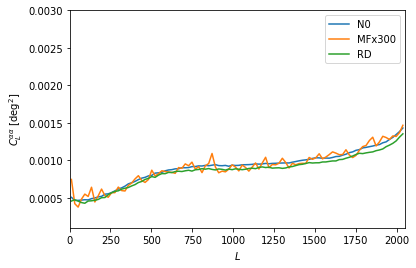

In [2]:
# Noise spectra
ps, fs = prjlib.filename_init(stype='lcmb',rlmin='200',doreal='True',dearot='True')
mb = bins.multipole_binning(100)
n0 = s*prjlib.binned_cl(ps.quad.f['EB'].n0bs,mb)
mf = s*prjlib.binned_cl(ps.quad.f['EB'].mfcl,mb)
rd = s*prjlib.binned_cl(ps.quad.f['EB'].rdn0[0],mb)
pl.plot_1dstyle(ylab=r'$C_L^{\alpha\alpha}$ [deg$^2$]',xmin=1,xmax=2048,ymin=1e-4,ymax=3e-3)
#errorbar(b,scb,yerr=vcb,fmt='o',label='Measured spectrum')
plot(mb.bc,n0,label='N0')
plot(mb.bc,mf*300,label='MFx300')
plot(mb.bc,rd,label='RD')
legend(loc=0)

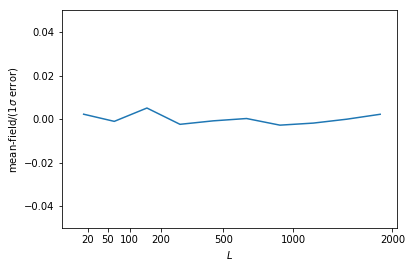

In [3]:
pl.plot_1dstyle(ylab=r'mean-field/($1\sigma$ error)',spc='p2',xmin=1,xmax=2048,ymin=-.05,ymax=.05)
mb = bins.multipole_binning(10,spc='p2')
mf = s*prjlib.binned_cl(ps.quad.f['EB'].mfcl,mb)
n0 = s*prjlib.binned_cl(ps.quad.f['EB'].n0bs,mb)
scb = s*prjlib.binned_cl_rlz(ps.quad.f['EB'].cl,0,200,mb)
vcb = np.std(scb,axis=0)
plot(np.sqrt(mb.bc),(mf-n0/300.)/vcb)
#legend(loc=0)

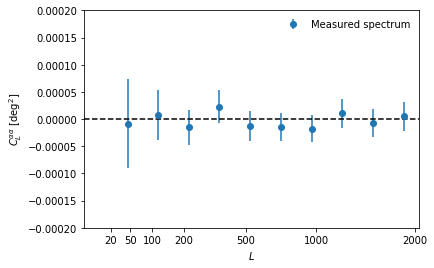

In [4]:
mb = bins.multipole_binning(10,lmin=20,spc='p2')
ocb = s*prjlib.binned_cl(ps.quad.f['EB'].cl[0],mb)
scb = s*prjlib.binned_cl_rlz(ps.quad.f['EB'].cl,0,200,mb)
vcb = np.std(scb,axis=0)
pl.plot_1dstyle(ylab=r'$C_L^{\alpha\alpha}$ [deg$^2$]',spc='p2',xmin=1,xmax=2048,ymin=-2*1e-4,ymax=2*1e-4)
errorbar(np.sqrt(mb.bc),ocb,yerr=vcb,fmt='o',label='Measured spectrum')
#errorbar(np.sqrt(mb.bc),scb[0,:],yerr=vcb,fmt='o',label='rlz1')
#errorbar(np.sqrt(mb.bc),scb[49,:],yerr=vcb,fmt='o',label='rlz50')
#errorbar(np.sqrt(mb.bc),scb[99,:],yerr=vcb,fmt='o',label='rlz100')
axhline(0,color='k',ls='--')
legend(loc=0,frameon=False)

In [5]:
pa, fa = prjlib.filename_init(stype='a0p3',rlmin='200',doreal='True')
mb = bins.multipole_binning(100,spc='p2')
scb = prjlib.binned_cl_rlz(pa.quad.f['EB'].cl,0,100,mb)
mcb = np.mean(scb,axis=0)
vcb = np.std(scb,axis=0)
xcb = prjlib.binned_cl_rlz(pa.quad.f['EB'].cl,0,100,mb,cn=4)
mxb = np.mean(xcb,axis=0)
vxb = np.std(xcb,axis=0)
n0 = prjlib.binned_cl(pa.quad.f['EB'].n0bl,mb)
pl.plot_1dstyle(ylab=r'$C_L^{\alpha\alpha}$ [deg$^2$]',xmin=1,xmax=2048,ymin=1e-10,ymax=1e-4)
xscale('log')
yscale('log')
errorbar(mb.bc,mcb,yerr=vcb,fmt='o',label='Measured spectrum')
errorbar(mb.bc,mxb,yerr=vxb,fmt='o',label='cross')
x = np.arange(1,2048,1)
loglog(x,2.*np.pi/x/(x+1.)*1e-4*0.3,label=r'Scale-invariant spectrum with $A_{CB}=0.3$')
#legend(loc=1,frameon=False)
#savefig('fig_claa_cb.png')

OSError: /global/homes/t/toshiyan/Work/Ongoing/ACT/data/curvedsky/rot/aps/rlz/cl_EB_a0p3_s14+15_deep56_ns2048_lc100_a1deg_l200-2048_real.dat not found.